In [3]:
import pandas as pd
data=pd.read_csv("HR_comma_sep.csv")

In [11]:
data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['sales']=encoder.fit_transform(data['sales'])
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,low
1,0.80,0.86,5,262,6,0,1,0,7,medium
2,0.11,0.88,7,272,4,0,1,0,7,medium
3,0.72,0.87,5,223,5,0,1,0,7,low
4,0.37,0.52,2,159,3,0,1,0,7,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,low
14995,0.37,0.48,2,160,3,0,1,0,8,low
14996,0.37,0.53,2,143,3,0,1,0,8,low
14997,0.11,0.96,6,280,4,0,1,0,8,low


In [16]:
from sklearn.preprocessing import StandardScaler
features = ['satisfaction_level','last_evaluation','number_project', 'average_montly_hours','time_spend_company','Work_accident', 'left','promotion_last_5years','sales']
x = data.loc[:, features].values
x_standardized = StandardScaler().fit_transform(x)
x_standardized

array([[-0.93649469, -1.08727529, -1.46286291, ...,  1.788917  ,
        -0.14741182,  0.39372503],
       [ 0.75281433,  0.84070693,  0.97111292, ...,  1.788917  ,
        -0.14741182,  0.39372503],
       [-2.02247906,  0.95755433,  2.59376348, ...,  1.788917  ,
        -0.14741182,  0.39372503],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ...,  1.788917  ,
        -0.14741182,  0.74231612],
       [-2.02247906,  1.42494396,  1.7824382 , ...,  1.788917  ,
        -0.14741182,  0.74231612],
       [-0.97671633, -1.14569899, -1.46286291, ...,  1.788917  ,
        -0.14741182,  0.74231612]])

In [17]:
import numpy as np
cov_data = np.corrcoef(x.T)
cov_data

array([[ 1.        ,  0.10502121, -0.14296959, -0.02004811, -0.10086607,
         0.05869724, -0.38837498,  0.02560519,  0.0031533 ],
       [ 0.10502121,  1.        ,  0.34933259,  0.3397418 ,  0.13159072,
        -0.00710429,  0.00656712, -0.00868377,  0.00777212],
       [-0.14296959,  0.34933259,  1.        ,  0.41721063,  0.19678589,
        -0.00474055,  0.02378719, -0.00606396,  0.00926828],
       [-0.02004811,  0.3397418 ,  0.41721063,  1.        ,  0.12775491,
        -0.01014289,  0.07128718, -0.00354441,  0.00391313],
       [-0.10086607,  0.13159072,  0.19678589,  0.12775491,  1.        ,
         0.00212042,  0.14482217,  0.06743293, -0.01800956],
       [ 0.05869724, -0.00710429, -0.00474055, -0.01014289,  0.00212042,
         1.        , -0.15462163,  0.03924543,  0.00342508],
       [-0.38837498,  0.00656712,  0.02378719,  0.07128718,  0.14482217,
        -0.15462163,  1.        , -0.06178811,  0.03210529],
       [ 0.02560519, -0.00868377, -0.00606396, -0.00354441,  0

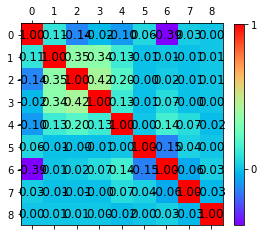

In [18]:
import matplotlib.pyplot as plt
img = plt.matshow(cov_data, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=12, color='black', ha="center", va="center")
        
plt.show()

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components=pca.fit_transform(x_standardized)
principalDF=pd.DataFrame(data=principal_components, columns= ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDF, data[['salary']]], axis = 1)
finalDf

,principal component 1,principal component 2,salary
0,-1.297678,-2.453285,low
1,2.421709,-0.388101,medium
2,3.554289,-1.644091,medium
3,1.870942,-0.625829,low
4,-1.296087,-2.488788,low
...,...,...,...
14994,-1.263202,-2.363284,low
14995,-1.389361,-2.568438,low
14996,-1.432827,-2.538115,low
14997,3.407774,-1.579578,low


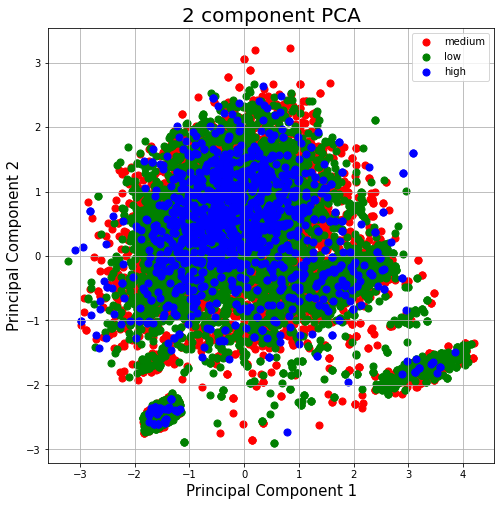

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['medium', 'low', 'high']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['salary'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()